#### Data_source : https://grouplens.org/datasets/movielens/100k/

In [601]:
%matplotlib inline

In [602]:
#Import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [603]:
#read u.data file from the folder and name the columns after referring to the Readme file in the same folder
ratings = pd.read_csv('ml-100k\\u.data',
                      sep = '\t',names= ['UseID', 'ItemID', 'rating', 'Timestamp' ])
print(ratings.shape)
ratings.head()

(100000, 4)


,UseID,ItemID,rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [604]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   UseID      100000 non-null  int64
 1   ItemID     100000 non-null  int64
 2   rating     100000 non-null  int64
 3   Timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [605]:
ratings.isna().apply(pd.value_counts)   #missing value check

,UseID,ItemID,rating,Timestamp
False,100000,100000,100000,100000


In [606]:
# Create a list of column names by copy pasting from the Readme file and read the u.item file by passing the list 'col_n'
col_n = ['movie id' , 'movie title' , 'release date' , 'video release date' ,
              'IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western']


movies = pd.read_csv('ml-100k\\u.item', 
                       sep = '|',encoding = 'latin-1',names=col_n )
print(movies.shape)
movies.head()

(1682, 24)


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [607]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie id            1682 non-null   int64  
 1   movie title         1682 non-null   object 
 2   release date        1681 non-null   object 
 3   video release date  0 non-null      float64
 4   IMDb URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [608]:
# Dropping irrelevant columns
movies.drop(columns= ['video release date', 'IMDb URL'], inplace=True)  #drop unnecessary columns 


In [609]:
# looking at the counts of individual genres
l = []
for i in movies.loc[:,'unknown' : 'Western'].columns:
    b = movies[i].value_counts()[1]
    l.append(b)
print(l)
print(movies.loc[:,'unknown' : 'Western'].columns)

[2, 251, 135, 42, 122, 505, 109, 50, 725, 22, 24, 92, 56, 61, 247, 101, 251, 71, 27]
Index(['unknown', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')


In [610]:
#the unknown column has only 2 entries. let's look at them
movies[movies['unknown']== 1]


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,267,unknown,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1372,1373,Good Morning (1971),4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [611]:
#let's see if there is information about the movieid 1373
ratings[ratings.ItemID == 1373]

,UseID,ItemID,rating,Timestamp
8567,181,1373,1,878962052


In [612]:
# Since there is unknown column doesnt have a lot of info and the only movie associated with it was rated only once
movies.drop(movies[movies['unknown'] == 1].index, axis=0, inplace=True)
movies.drop(columns= 'unknown',inplace=True)


In [613]:
movies.isna().apply(pd.value_counts)  #missing value check

,movie id,movie title,release date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
False,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680,...,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680


In [614]:
print(movies.shape)
movies.head()

(1680, 21)


,movie id,movie title,release date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [615]:
# read the u.user data and name the columns as per the Readme document in the folder
users = pd.read_csv('ml-100k\\u.user',
                    sep = '|', names= ['UserID',  'Age', 'Gender', 'Occupation','Zip-code'])
print(users.shape)
users.head()

(943, 5)


,UserID,Age,Gender,Occupation,Zip-code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [616]:
users.isna().apply(pd.value_counts) #missing value check

,UserID,Age,Gender,Occupation,Zip-code
False,943,943,943,943,943


## Univariate plots of columns: 'rating', 'Age', 'release date', 'Gender' and 'Occupation'

In [617]:
x = ratings.rating.value_counts()    #Values for x-axis
x

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

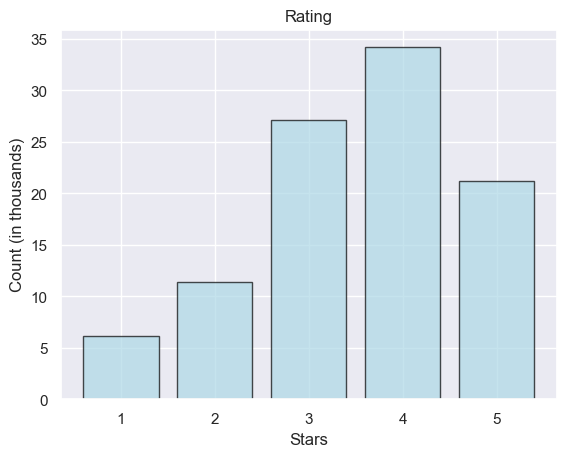

In [618]:
# Bar chart to view distribution of ratings accross all movies
x = ratings.rating.value_counts().index    #Values for x-axis
y = [ratings['rating'].value_counts()[i]/1000 for i in x]   #count(in thousands) on y-axis 


plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black', alpha = 0.7)  #plot a bar chart
plt.xlabel('Stars')
plt.ylabel('Count (in thousands)')
plt.title('Rating')

plt.show()


C:\Users\abdas\AppData\Local\Temp\ipykernel_10736\876738852.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users.Age)


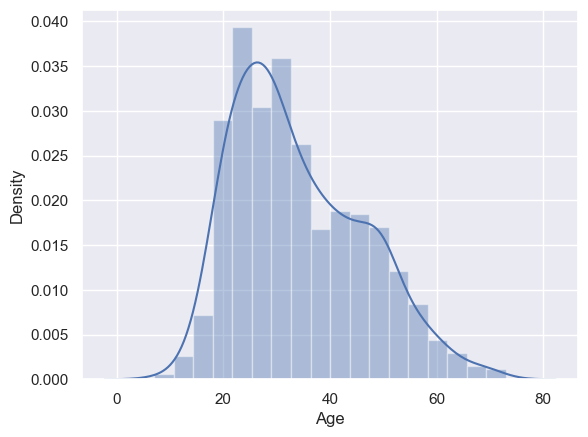

In [619]:
# Distribution of age 
sns.set()    #setting seaborn style to default
sns.distplot(users.Age)
plt.show()

C:\Users\abdas\AppData\Local\Temp\ipykernel_10736\2977180047.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movies.release_year)


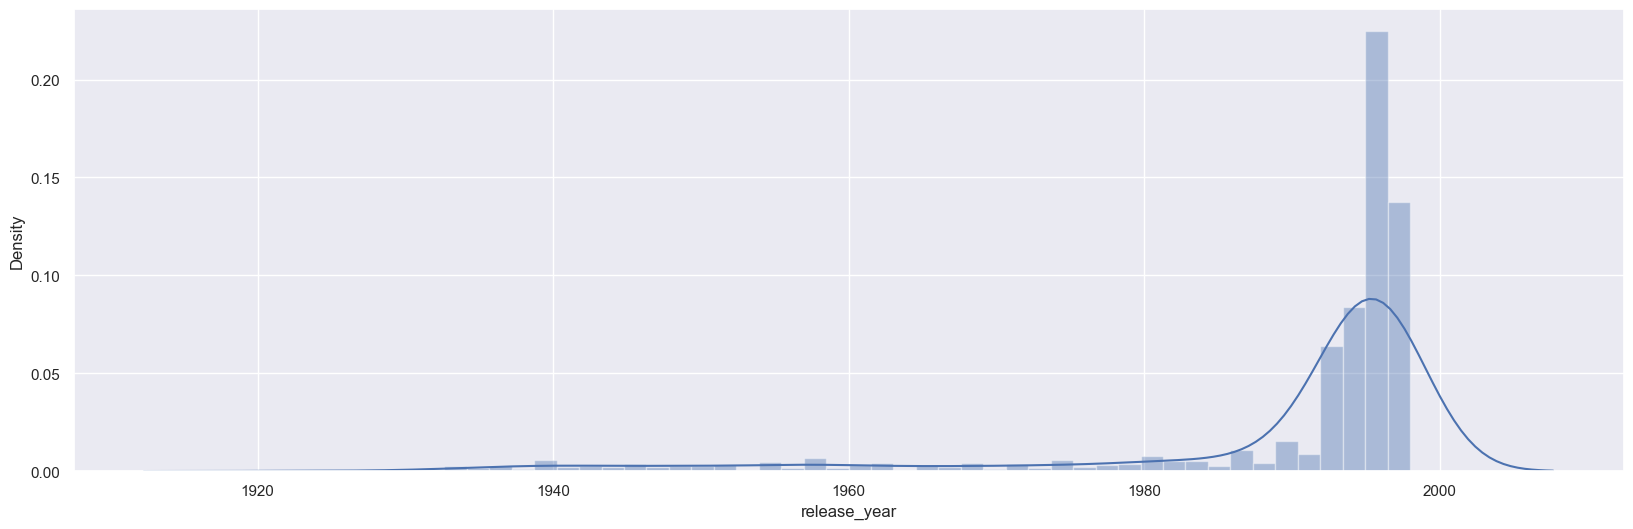

In [620]:
# Distribution of movies w.r.t release year
movies['release_year'] = movies['release date'].str.split('-', expand = True)[2]  #seperating out the year from the date
movies['release_year'] = movies.release_year.astype(int)  # changing the type to int
plt.figure(figsize=(20,6))    #increasing the figure size
sns.distplot(movies.release_year)
plt.show()


C:\Users\abdas\AppData\Local\Temp\ipykernel_10736\3732082957.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(users.Gender, palette=['lightblue','pink'])


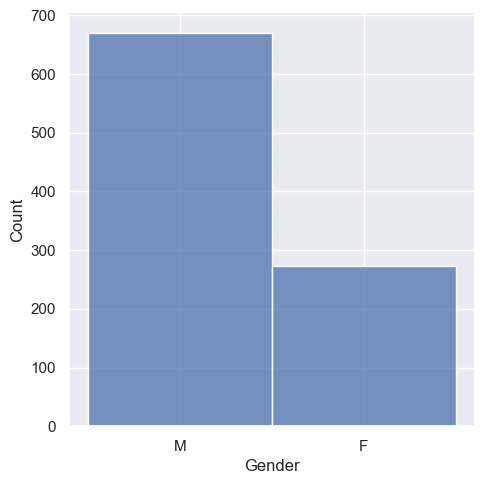

In [621]:
#Gender distribution
sns.displot(users.Gender, palette=['lightblue','pink'])
plt.show()


<Figure size 1500x600 with 0 Axes>

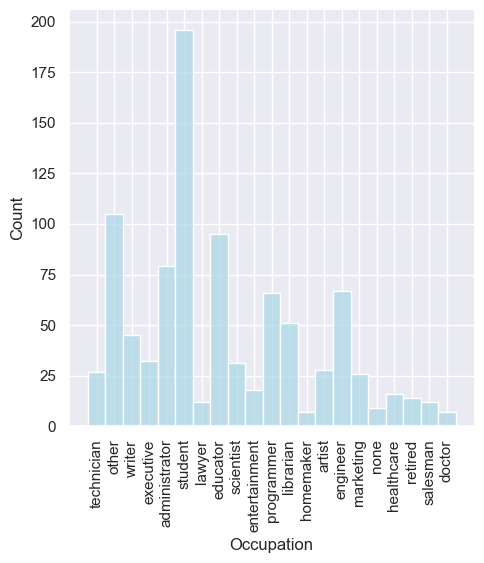

In [622]:
#Distribution of users w.r.t population

plt.figure(figsize=(15,6))

sns.displot(users.Occupation, color= 'lightblue')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

## Visualize how popularity of genres has changed over the years

In [623]:
genre_by_year = movies.groupby('release_year').sum()
genre_by_year = genre_by_year.drop(columns = 'movie id').T
genre_by_year

C:\Users\abdas\AppData\Local\Temp\ipykernel_10736\148234883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genre_by_year = movies.groupby('release_year').sum()


release_year,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
Action,0,0,0,0,0,0,0,0,0,0,...,6,7,2,8,20,30,40,44,46,12
Adventure,0,0,0,0,0,0,0,0,0,0,...,4,1,1,1,9,13,22,24,20,3
Animation,0,0,0,0,0,0,0,0,0,1,...,0,0,1,2,1,4,6,9,3,0
Children's,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,6,15,21,21,22,1
Comedy,0,0,0,0,0,1,2,2,1,2,...,3,6,6,12,39,82,63,108,87,13
Crime,0,0,0,1,0,0,0,0,0,0,...,1,3,0,5,7,8,11,21,30,7
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,4,9,5,18,6,3
Drama,0,1,1,0,0,0,1,0,1,1,...,8,12,11,14,64,97,89,170,113,33
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,3,6,4,1
Film-Noir,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,2,2


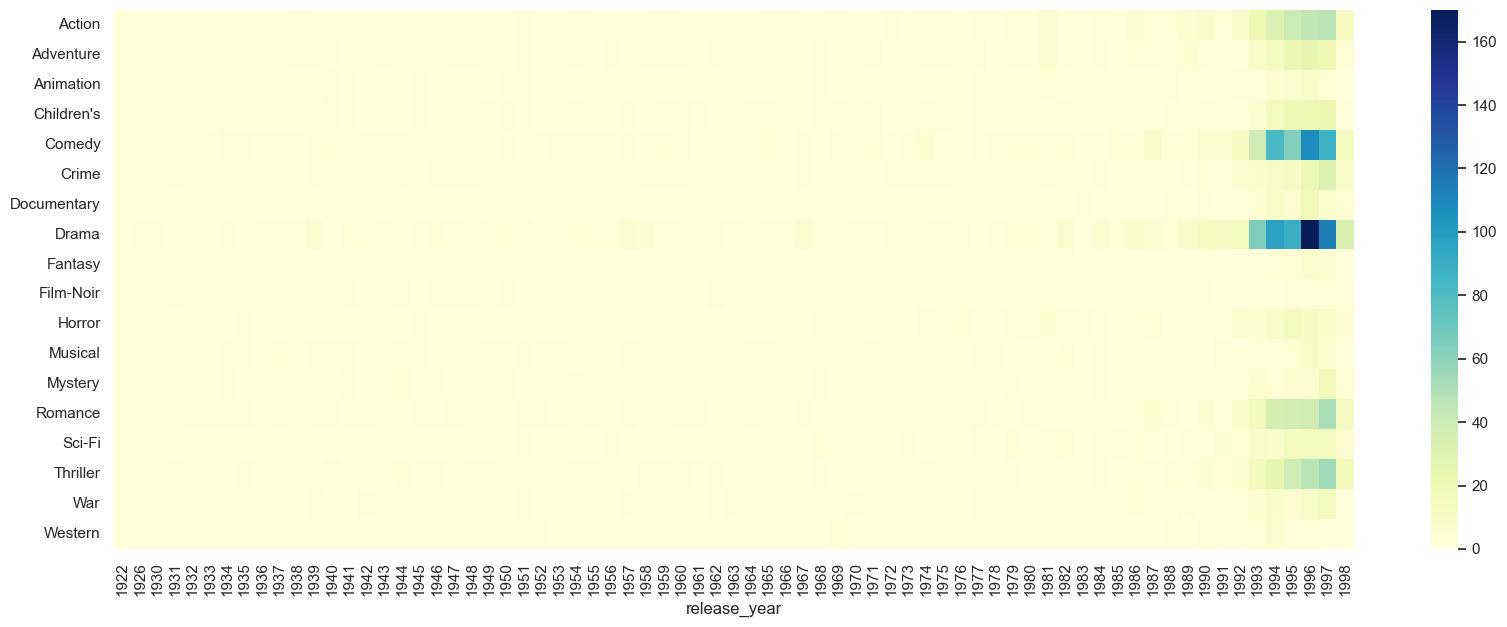

In [624]:
plt.figure(figsize=(20,7))  #setting the figure size
sns.heatmap(genre_by_year, cmap='YlGnBu')  #heat map to plot the above table
plt.show()

## Find the top 25 movies, each having a minimum of 100 ratings

In [625]:
items = ratings.groupby('ItemID').count()

items = items[ratings.groupby('ItemID').count().UseID > 100].index

items = ratings.loc[ratings.ItemID.isin(items)]

items = items.groupby('ItemID').mean()

items = items.sort_values('rating',ascending = False)

order = items.index

In [626]:
rating_list = items.rating[0:25]

C:\Users\abdas\AppData\Local\Temp\ipykernel_10736\3930223801.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  rating_list = items.rating[0:25]


In [627]:
items = movies.loc[movies['movie id'].isin(order)]

In [628]:
top_25_movies = items.set_index('movie id').loc[order]

top_25_movies = top_25_movies.iloc[0:25, 0]

In [629]:
top_25_movies = top_25_movies.reset_index()

In [630]:
top_25_movies['avg_rating'] =  rating_list.values

In [631]:
top_25_movies

,ItemID,movie title,avg_rating
0,408,"Close Shave, A (1995)",4.491071
1,318,Schindler's List (1993),4.466443
2,169,"Wrong Trousers, The (1993)",4.466102
3,483,Casablanca (1942),4.456790
4,64,"Shawshank Redemption, The (1994)",4.445230
5,603,Rear Window (1954),4.387560
6,12,"Usual Suspects, The (1995)",4.385768
7,50,Star Wars (1977),4.358491
8,178,12 Angry Men (1957),4.344000
9,134,Citizen Kane (1941),4.292929


## See gender distribution accross different genres

Verify the following:
* Men watch more drama than women
* Women watch more Sci-Fi than men

In [632]:
movies.columns  # columns of movies dataframe

Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'release_year'],
      dtype='object')

In [633]:
users.columns   #columns of users dataframe

Index(['UserID', 'Age', 'Gender', 'Occupation', 'Zip-code'], dtype='object')

In [634]:
ratings.columns  # columns of ratings dataframe

Index(['UseID', 'ItemID', 'rating', 'Timestamp'], dtype='object')

In [635]:
ratings.rename(columns= {'UseID' : 'UserID'}, inplace=True)  
#Renaming the column to have the same column name so that we can perform join operation

In [636]:
result = pd.merge(ratings, users, how='inner', on='UserID')  #merging dataframes with UserID as the key


In [637]:
movies.rename(columns= {'movie id' : 'ItemID'}, inplace= True)
#Renaming the column to have the same column name so that we can perform join operation

In [638]:
result = pd.merge(result, movies, how='inner', on='ItemID')  # merging dataframes with ItemID as the key

In [639]:
result.head()   

,UserID,ItemID,rating,Timestamp,Age,Gender,Occupation,Zip-code,movie title,release date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997


In [640]:
Genre_by_gender = result.groupby('Gender').sum().loc[:,'Action':'Western']  #Group by gender and aggregate with sum and select all the genre columns 

C:\Users\abdas\AppData\Local\Temp\ipykernel_10736\1453466475.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Genre_by_gender = result.groupby('Gender').sum().loc[:,'Action':'Western']  #Group by gender and aggregate with sum and select all the genre columns


In [641]:
Genre_by_gender['total'] = Genre_by_gender.sum(axis = 1)  #Row total of the dataframe

In [642]:
Genre_by_gender

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
Gender,,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,53701
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,158884


In [643]:
Genre_by_gender.div(Genre_by_gender.total, axis= 0) * 100  #dividing each cell with row total and multiplying by 100

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
Gender,,,,,,,,,,,,,,,,,,,
F,10.133889,5.849053,1.852852,4.156347,15.023929,3.340720,0.348224,20.498687,0.675965,0.716933,2.229009,2.685239,2.446882,10.908549,4.895626,9.47096,4.076274,0.690862,100.0
M,12.680320,6.679087,1.642708,3.115480,13.698044,3.940611,0.359382,18.181189,0.622467,0.848418,2.593087,2.210418,2.474132,8.561592,6.357468,10.56494,4.537272,0.933385,100.0


Conclusion: 
* Of all the women, 20% watched Drama   and of all the men,  18% watched Drama
* Of all the women, 4.8% watched Sci-Fi and of all the men,  6.3% watched Sci-Fi

#####  Answer: All the statements were false. 